# _Loan Project - Classification_
**_Importing the required libraries & packages_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import pickle
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
import pyodbc
import warnings
warnings.filterwarnings('ignore')

## _Data Reading_
**_Processed the input data using Structured Query Language (SQL) and done some cleaning,with the help of <span style='color:violet'> pyodbc </span> package connecting Jupyter Notebook with sql server in the following 3 cells._**

In [2]:
server = 'BALA\SQLEXPRESS'
db = 'Projects'

In [3]:
conn = pyodbc.connect ('DRIVER= {SQL Server}; SERVER='+server+';DATABASE='+db+ ';UID=bala sql;PWD=bala2252bala; Trusted connection=YES')

In [4]:
sql = 'select * from acc_ord_card_disp_client_dist aocdcd join loan_trans lt on lt.account_id= aocdcd.disposition_account_id'

**_Changing The Default Working Directory Path_**

In [5]:
os.chdir('C:\\Users\\chand\\OneDrive\\Desktop\\Loan projects\\')

**_Reading The SQL File Using Pandas Command_**

In [6]:
df = pd.read_sql(sql,conn)

**_Exporting the data after processing in SQL, the final data is converted to comma seperated file(csv)._**

In [7]:
df.to_csv('Loan_Final_Data.csv',index=False)

## _Exploratory Data Analysis_
**_Checking the Null values of all the Columns in the dataset_**

In [8]:
df.isna().sum()

card_id                     0
disp_id                     0
type                        0
issued                      0
disposition_account_id      0
disposition_client_id       0
disposition_type            0
client_id                   0
birth_number                0
district_id                 0
A1                          0
A2                          0
A3                          0
A4                          0
A5                          0
A6                          0
A7                          0
A8                          0
A9                          0
A10                         0
A11                         0
A12                         0
A13                         0
A14                         0
A15                         0
A16                         0
order_id                    0
bank_to                     0
account_to                  0
amount                      0
k_symbol                    0
account_date                0
account_district_id         0
account_fr

**_Checking the dataset whether its is having a duplicate values or not_**

In [9]:
df.duplicated().sum()

0

**_Getting to describe the numerical columns of the dataset_**

In [10]:
df.describe()

,card_id,disp_id,disposition_account_id,disposition_client_id,client_id,birth_number,district_id,A1,A4,A5,...,account_district_id,trans_id,account_id,amount,balance,account,loan_id,loan_amount,loan_duration,loan_payments
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,8.680000e+02,868.000000,...,868.000000,8.680000e+02,868.000000,868.000000,868.000000,2.050000e+02,868.000000,868.000000,868.000000,868.000000
mean,907.690092,8139.987327,6767.154378,8265.955069,8265.955069,685696.934332,37.332949,37.332949,1.407953e+05,41.294931,...,39.427419,2.276811e+06,6767.154378,13533.202650,51020.558765,3.346704e+07,6374.570276,124083.428571,27.069124,4954.557604
std,238.683175,3244.507382,2715.120458,3376.937067,3376.937067,149850.689100,23.864496,23.864496,1.281183e+05,23.132398,...,25.833877,9.593156e+05,2715.120458,15346.995182,28746.846180,3.115044e+07,561.596458,74014.846356,16.620600,2019.525078
min,159.000000,946.000000,790.000000,946.000000,946.000000,351003.000000,1.000000,1.000000,5.131300e+04,0.000000,...,1.000000,2.320620e+05,790.000000,5.400000,200.000000,0.000000e+00,5126.000000,14628.000000,12.000000,1177.000000
25%,844.000000,6567.000000,5442.000000,6567.000000,6567.000000,570929.000000,14.000000,14.000000,8.651300e+04,21.000000,...,12.000000,1.602809e+06,5442.000000,306.224991,31045.900391,7.772154e+06,6112.000000,78939.000000,12.000000,3222.000000
50%,857.000000,6789.000000,5622.000000,6789.000000,6789.000000,780907.000000,32.000000,32.000000,1.050580e+05,34.000000,...,45.000000,1.852832e+06,5622.000000,7000.000000,47310.150391,2.417564e+07,6150.000000,105804.000000,24.000000,4579.000000
75%,1100.000000,11101.000000,9265.000000,11409.000000,11409.000000,790326.000000,57.000000,57.000000,1.619540e+05,65.000000,...,62.000000,3.314625e+06,9265.000000,22933.750000,67505.726562,6.987126e+07,6888.000000,174744.000000,36.000000,6918.000000
max,1223.000000,13231.000000,11013.000000,13539.000000,13539.000000,805502.000000,74.000000,74.000000,1.204953e+06,98.000000,...,74.000000,3.675971e+06,11013.000000,63366.000000,143605.703125,9.867897e+07,7240.000000,331560.000000,60.000000,7281.000000


**_Finding the shape of the dataset_**

In [11]:
df.shape

(868, 50)

**_Since it has many columns,to extract the columns we need getting all the column names. so that we can identify the necessary columns_**

In [12]:
df.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'disposition_account_id',
       'disposition_client_id', 'disposition_type', 'client_id',
       'birth_number', 'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id',
       'bank_to', 'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'account_frequency', 'trans_id', 'account_id',
       'date', 'type', 'operation', 'amount', 'balance', 'k_symbol', 'bank',
       'account', 'loan_id', 'loan_date', 'loan_amount', 'loan_duration',
       'loan_payments', 'loan_status'],
      dtype='object')

## _Data Cleaning_
**_Checking the value counts for `loan_status` columns from the dataset_**

In [13]:
df['loan_status'].value_counts()

A    648
B    168
C     51
D      1
Name: loan_status, dtype: int64

**_Label Encoding the <span style='color:blue'>loan_status</span> columns using mapping function._**

In [14]:
df['loan_status']=df['loan_status'].map({'A':0,'B':1,'C':2,'D':3})

**_After Label Encoding , Checking the values to verify there's no missing arguments in the `loan_status` column._**

In [15]:
df.groupby('loan_status').size()

loan_status
0    648
1    168
2     51
3      1
dtype: int64

## _Data Visualizations_
**_Getting the correlation value from the needed columns from the dataset. using seaborn Heatmap & saving the PNG file_**

<AxesSubplot:>

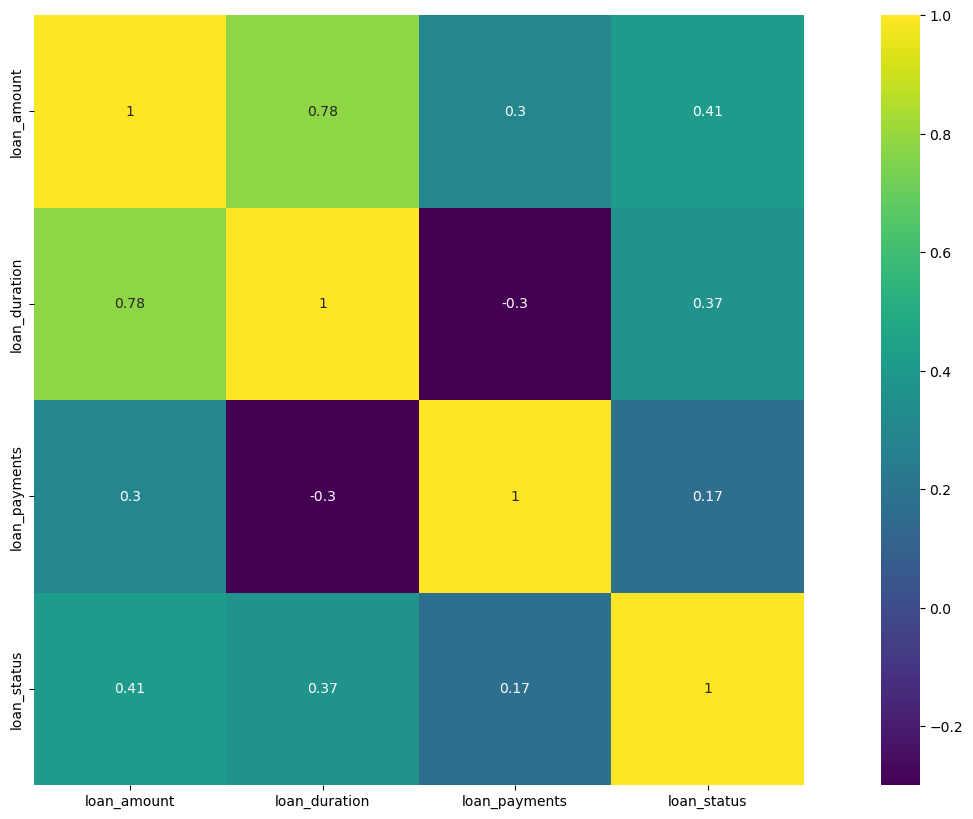

In [16]:
corr = df.iloc[:,46:50].corr()
sns.heatmap(corr,annot=True,cbar=True,square=True,cmap='viridis')

**_Plotting the bar graph with loan_status and loan_duration and saving the Png file._**

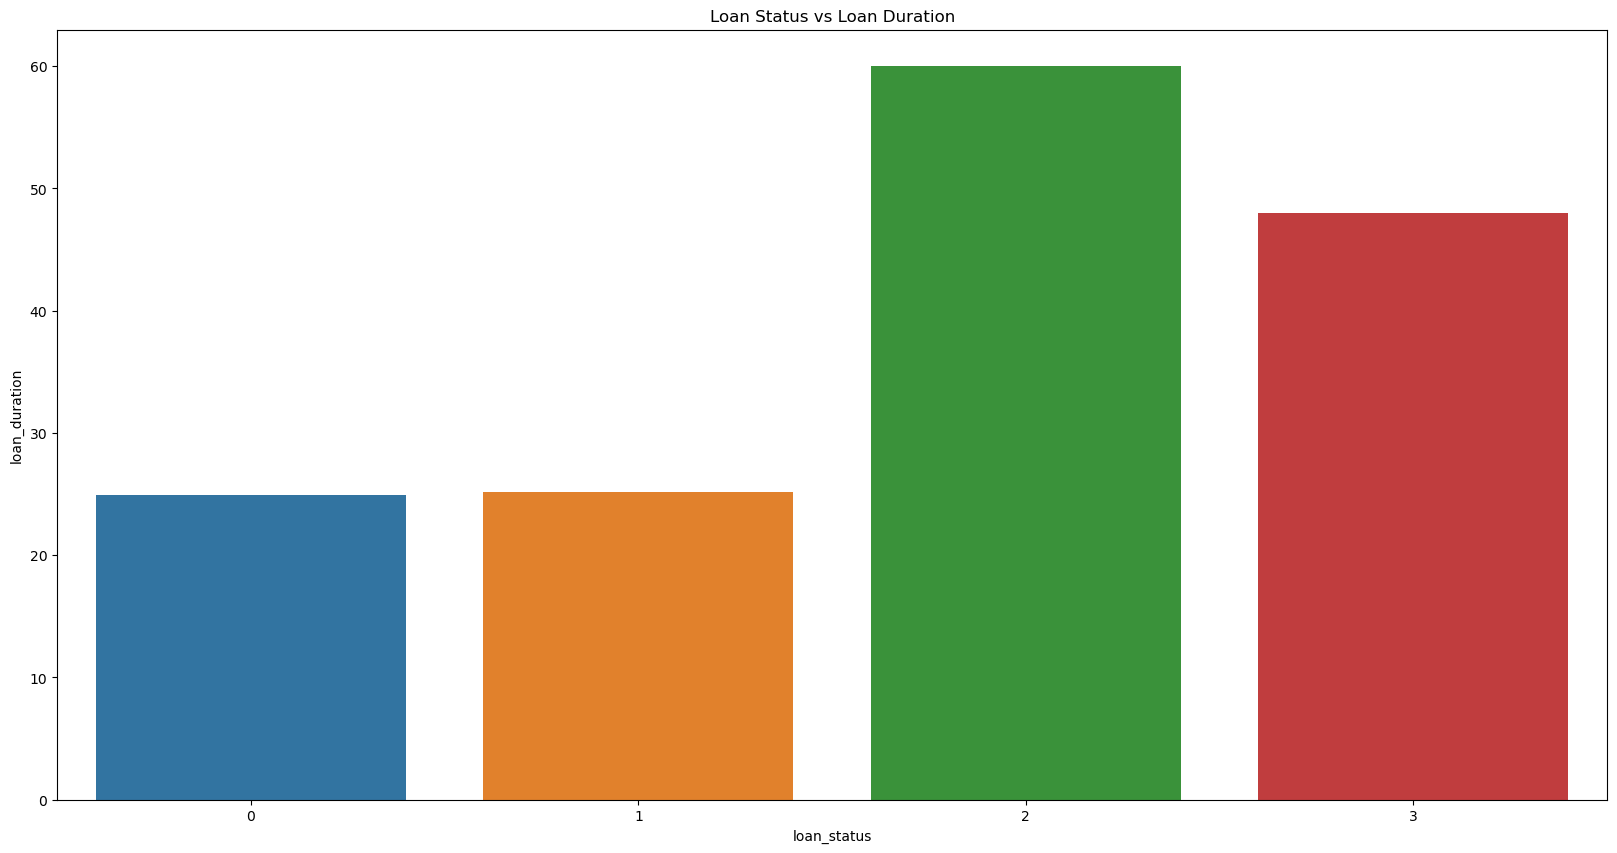

In [17]:
plot = sns.barplot(x = 'loan_status',y = 'loan_duration',data = df,ci = None)
plt.title('Loan Status vs Loan Duration')
plt.savefig('Loan Status vs Loan Duration.png')
plt.show()

**_Plotting the Bar Graph with count of customers based on the `Loan_duration` and confirm that there are no null values and identify all the unique values from the `loan_duration` and saving the png file_**

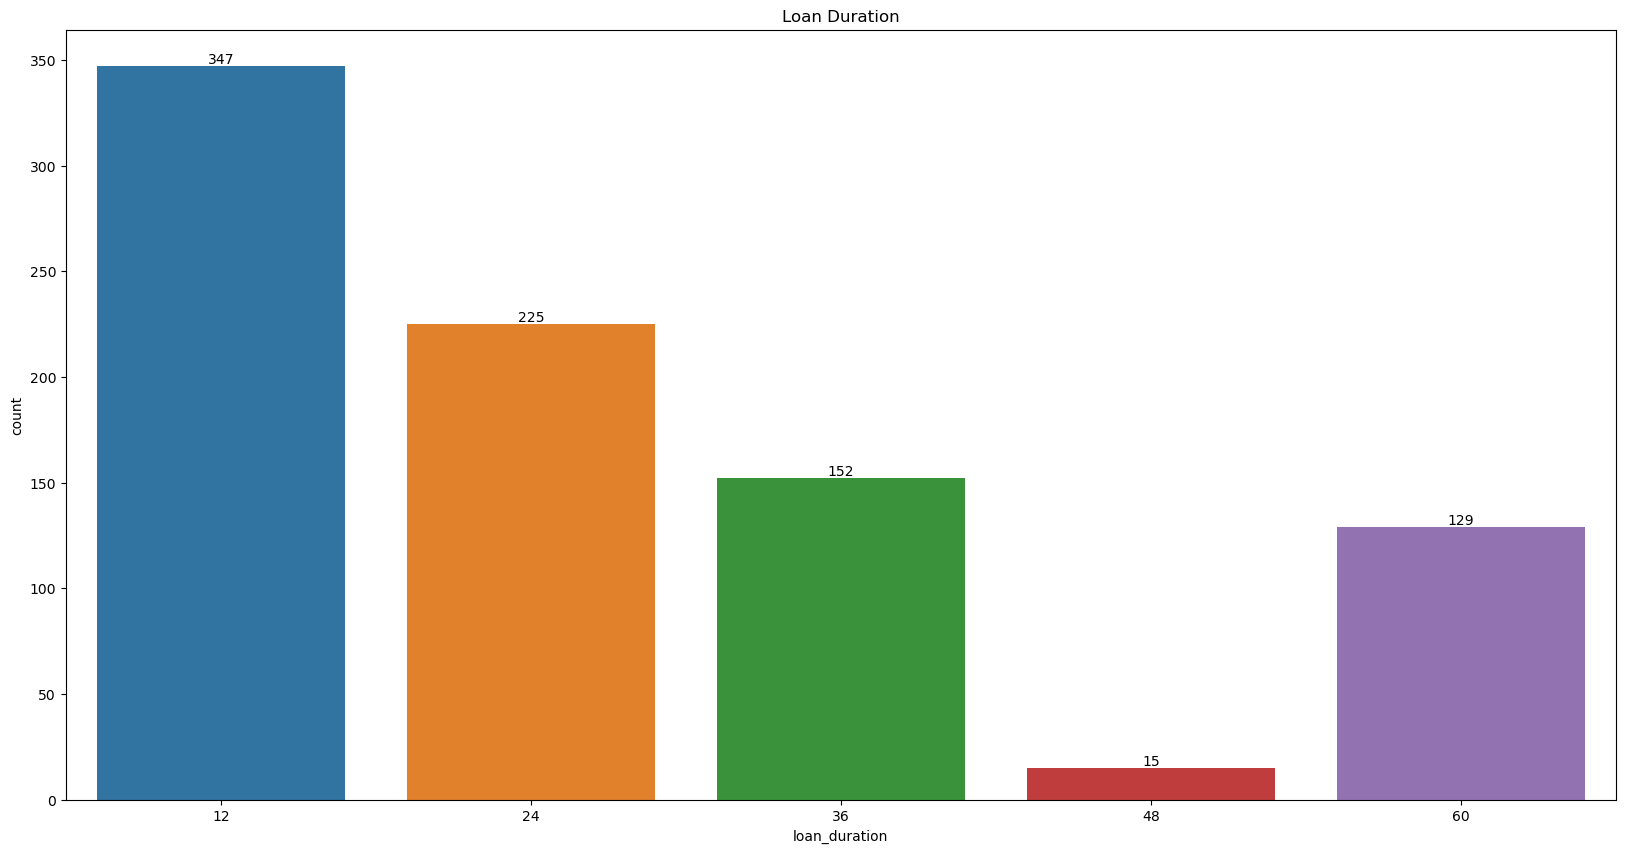

In [18]:
plot = sns.countplot(x =df['loan_duration'],data = df)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Loan Duration')
plt.savefig('Loan Duration.png')
plt.show()

**_Assigning the dependent and independent variables_**

In [19]:
x = df.iloc[:,46:49]
y = df.iloc[:,49]

## _Data Preprocessing_
**_Standardizing the independent variable of the dataset_**

In [20]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

## _Model Fitting_
**_Defining the Function for the ML algorithms using GridSearchCV Algorithm and Predicting the Dependent Variable by fitting the given model and create the pickle file of the model with the given Algo_name. Further getting the Algorithm Name, Best Parameters of the algorithm, accuracy score in percentage format,mean absolute error ,mean squared error , rooted mean squared error ,classification report and confusion matrix between the predicted values and dependent test dataset._**

In [21]:
def FitModel(x,y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=51)
    grid = GridSearchCV(estimator=algorithm,param_grid=gridSearchParams,scoring='accuracy',verbose=0,cv=cv,n_jobs=-1)
    grid_result = grid.fit(x_train,y_train)
    best_params = grid_result.best_params_
    y_pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
    print(' Algorithm Name:',algo_name)
    print('\n Best Params:',best_params)
    print('\n Accuracy Score {} %'.format(100*accuracy_score(y_test,y_pred)))
    print('\n Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
    print('\n Mean Squared Error:',mean_squared_error(y_test,y_pred))
    print('\n Rooted Mean Squared Error:',sqrt(mean_squared_error(y_test,y_pred)))
    print('\n Classification Report:\n ',classification_report(y_test,y_pred))
    print('\n Confusion Matrix','\n',cm)

**_Running the function with empty parameters since the Logistic Regression model doesn't need any special parameters and fitting the Linear Regression Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, accuracy score in percentage format,mean absolute error ,mean squared error , rooted mean squared error ,classification report and confusion matrix between the predicted values and dependent test dataset and also the pickle file with the name Logistic Regression._**

In [22]:
params = {}
FitModel(x,y,'Logistic Regression',LogisticRegression(),params,cv=10)

 Algorithm Name: Logistic Regression

 Best Params: {}

 Accuracy Score 98.27586206896551 %

 Mean Absolute Error: 0.017241379310344827

 Mean Squared Error: 0.017241379310344827

 Rooted Mean Squared Error: 0.13130643285972254

 Classification Report:
                precision    recall  f1-score   support

           0       0.99      0.98      0.99       127
           1       0.94      0.97      0.95        30
           2       1.00      1.00      1.00        17

    accuracy                           0.98       174
   macro avg       0.98      0.98      0.98       174
weighted avg       0.98      0.98      0.98       174


 Confusion Matrix 
 [[125   2   0]
 [  1  29   0]
 [  0   0  17]]


**_*Running the function with some appropriate parameters and fitting the Decision Tree Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Classification Report and Confusion Matrix  between the predicted values and dependent test dataset and also the pickle file with the name Decision Tree.*_**

In [23]:
params = {'criterion':['entropy','gini'],
         'max_depth':[1,2,3,4],
         'max_features':['auto','sqrt'],
         'min_samples_split':[5,6,7,8],
         'min_samples_leaf':[9,10,11,12]}
FitModel(x,y,'Decision Tree',DecisionTreeClassifier(),params,cv=10)

 Algorithm Name: Decision Tree

 Best Params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 8}

 Accuracy Score 98.85057471264368 %

 Mean Absolute Error: 0.017241379310344827

 Mean Squared Error: 0.028735632183908046

 Rooted Mean Squared Error: 0.1695158759052026

 Classification Report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99       127
           1       1.00      0.97      0.98        30
           2       0.94      1.00      0.97        17

    accuracy                           0.99       174
   macro avg       0.98      0.99      0.98       174
weighted avg       0.99      0.99      0.99       174


 Confusion Matrix 
 [[126   0   1]
 [  1  29   0]
 [  0   0  17]]


**_Running the function with some appropriate parameters and fitting the Random Forest Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name Random Forest._**

In [24]:
params = {'n_estimators':[111,222,333,444],
          'criterion':['entropy','gini'],
          'max_depth': [4],
          'max_features': ['sqrt'],
          'min_samples_leaf': [10], 
          'min_samples_split':[8]}
FitModel(x,y,'Random Forest',RandomForestClassifier(),params,cv=10)

 Algorithm Name: Random Forest

 Best Params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 111}

 Accuracy Score 99.42528735632183 %

 Mean Absolute Error: 0.005747126436781609

 Mean Squared Error: 0.005747126436781609

 Rooted Mean Squared Error: 0.07580980435789034

 Classification Report:
                precision    recall  f1-score   support

           0       0.99      1.00      1.00       127
           1       1.00      0.97      0.98        30
           2       1.00      1.00      1.00        17

    accuracy                           0.99       174
   macro avg       1.00      0.99      0.99       174
weighted avg       0.99      0.99      0.99       174


 Confusion Matrix 
 [[127   0   0]
 [  1  29   0]
 [  0   0  17]]


**_Running the function with some appropriate parameters and fitting the KNeighbors Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name KNeighbors._**

In [25]:
params = {'n_neighbors':[3,5,7,10,13]}
FitModel(x,y,'KNeighbors',KNeighborsClassifier(),params,cv=10)

 Algorithm Name: KNeighbors

 Best Params: {'n_neighbors': 3}

 Accuracy Score 99.42528735632183 %

 Mean Absolute Error: 0.005747126436781609

 Mean Squared Error: 0.005747126436781609

 Rooted Mean Squared Error: 0.07580980435789034

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.99      1.00       127
           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00        17

    accuracy                           0.99       174
   macro avg       0.99      1.00      0.99       174
weighted avg       0.99      0.99      0.99       174


 Confusion Matrix 
 [[126   1   0]
 [  0  30   0]
 [  0   0  17]]


**_Running the function with some appropriate parameters and fitting the Support Vector Machine Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name SVC._**

In [26]:
params = {'C':[0.1,1,100,1000],
         'gamma':[0.001,0.01,0.1,1]}
FitModel(x,y,'SVC',SVC(),params,cv=10)

 Algorithm Name: SVC

 Best Params: {'C': 1, 'gamma': 1}

 Accuracy Score 99.42528735632183 %

 Mean Absolute Error: 0.005747126436781609

 Mean Squared Error: 0.005747126436781609

 Rooted Mean Squared Error: 0.07580980435789034

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.99      1.00       127
           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00        17

    accuracy                           0.99       174
   macro avg       0.99      1.00      0.99       174
weighted avg       0.99      0.99      0.99       174


 Confusion Matrix 
 [[126   1   0]
 [  0  30   0]
 [  0   0  17]]


**_Running the function with some appropriate parameters and fitting the XG Boost Classifier Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name XG boost._**

In [27]:
params = {'n_estimators':[111,222,333,444]}
FitModel(x,y,'XG Boost',XGBClassifier(),params,cv=10)

 Algorithm Name: XG Boost

 Best Params: {'n_estimators': 111}

 Accuracy Score 100.0 %

 Mean Absolute Error: 0.0

 Mean Squared Error: 0.0

 Rooted Mean Squared Error: 0.0

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        17

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174


 Confusion Matrix 
 [[127   0   0]
 [  0  30   0]
 [  0   0  17]]


**_Running the function with empty parameters since the Cat Boost Classifier model doesn't need any special parameters and fitting the Cat Boost Classifier and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name Cat Boost._**

In [28]:
params = {}
FitModel(x,y,'Cat Boost',CatBoostClassifier(verbose=0),params,cv=10)

 Algorithm Name: Cat Boost

 Best Params: {}

 Accuracy Score 100.0 %

 Mean Absolute Error: 0.0

 Mean Squared Error: 0.0

 Rooted Mean Squared Error: 0.0

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        17

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174


 Confusion Matrix 
 [[127   0   0]
 [  0  30   0]
 [  0   0  17]]


**_Running the function with empty parameters since the Light GBM Classifier model doesn't need any special parameters and fitting the Light GBM Classifier and getting the Algorithm Name, Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name Light GBM._**

In [29]:
params = {}
FitModel(x,y,'Light GBM',LGBMClassifier(),params,cv=10)

 Algorithm Name: Light GBM

 Best Params: {}

 Accuracy Score 99.42528735632183 %

 Mean Absolute Error: 0.005747126436781609

 Mean Squared Error: 0.005747126436781609

 Rooted Mean Squared Error: 0.07580980435789034

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.99      1.00       127
           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00        17

    accuracy                           0.99       174
   macro avg       0.99      1.00      0.99       174
weighted avg       0.99      0.99      0.99       174


 Confusion Matrix 
 [[126   1   0]
 [  0  30   0]
 [  0   0  17]]


## _Model Testing_
**_Loading the pickle file with the algorithm which gives highest accuracy score_**

In [30]:
model = pickle.load(open('XG Boost','rb'))

**_Predicting the dependent variable of the whole data using the loaded pickle file and getting the Best Parameters of the algorithm, Accuracy Score in percentage format, Mean Absolute error, Mean Squared Error, Root Mean Squared error, Classification Report and Confusion Matrix between the predicted values and dependent dataset_**

In [31]:
pred = model.predict(x)
print('\n Accuracy Score {} %'.format(100*accuracy_score(y,pred)))
print('\n Mean Absolute Error:',mean_absolute_error(y,pred))
print('\n Mean Squared Error:',mean_squared_error(y,pred))
print('\n Rooted Mean Squared Error:',sqrt(mean_squared_error(y,pred)))
print('\n Classification Report:\n ',classification_report(y,pred))
print('\n Confusion Matrix','\n',confusion_matrix(y,pred))


 Accuracy Score 100.0 %

 Mean Absolute Error: 0.0

 Mean Squared Error: 0.0

 Rooted Mean Squared Error: 0.0

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00         1

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868


 Confusion Matrix 
 [[648   0   0   0]
 [  0 168   0   0]
 [  0   0  51   0]
 [  0   0   0   1]]


**_Making the Predicted value as a new dataframe with new column name as `predicted loan status (Approx.)` and concating it with the original data, so that we can able to compare the differences between Predicted Loan Status and Original Loan Status._**

In [32]:
prediction = pd.DataFrame(pred,columns=['Prediction Loan Status(Approx.)'])
pred_df = pd.concat([df,prediction],axis=1)

**_Exporting the Data With Predicted loan status to a csv file_**

In [33]:
pred_df.to_csv('Prediction Loan Status Data.csv',index=False)